In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score,accuracy_score,r2_score

In [2]:
cancer = load_breast_cancer()
X,y = cancer.data, cancer.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2, random_state =42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train_scaled,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred = model.predict(X_test_scaled)

In [17]:
accuracy_score(y_test,y_pred)

0.956140350877193

In [21]:
r2_score(y_test,y_pred)

0.8132983950212905

In [18]:
rbf_model = SVC(kernel = 'rbf', C =0.1,gamma = 'auto')
rbf_model.fit(X_train_scaled,y_train)

,C,0.1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred_rbf = rbf_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred_rbf)

0.9473684210526315

In [22]:
r2_score(y_test,y_pred_rbf)

0.7759580740255486

In [25]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

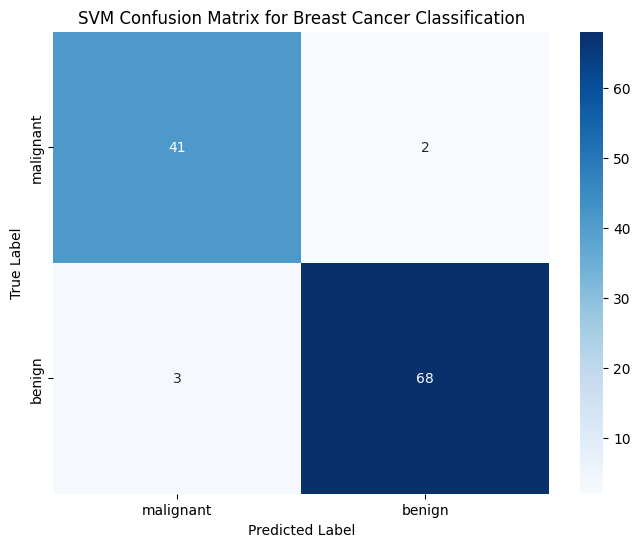

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)


class_names = cancer.target_names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix for Breast Cancer Classification')
plt.show()

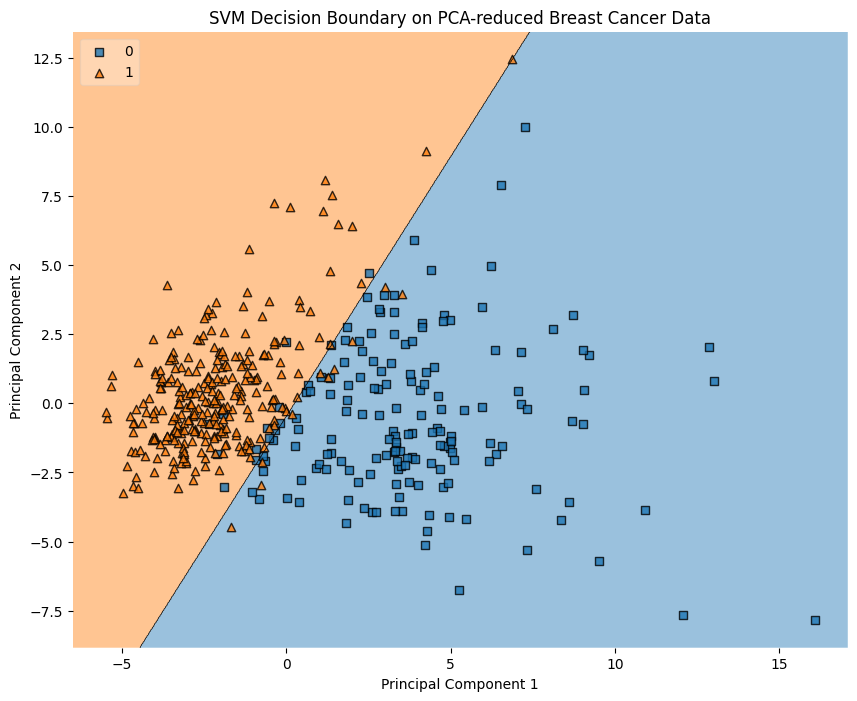

In [29]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


svm_pca_model = SVC(kernel='linear') # or 'rbf'
svm_pca_model.fit(X_train_pca, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_pca, y_train, clf=svm_pca_model, legend=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary on PCA-reduced Breast Cancer Data')
plt.show()